# Task 2 - Predictive Analytics

For the Data@ANZ Virtual Experience Program

1. Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

2. For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
#df.info()

## Explore salary feature

### First we identify monthly salary for each customer

In [4]:
df['month'] = pd.DatetimeIndex(df['date']).month
df[['customer_id', 'date', 'month']]

,customer_id,date,month
0,CUS-2487424745,2018-08-01,8
1,CUS-2487424745,2018-08-01,8
2,CUS-2142601169,2018-08-01,8
3,CUS-1614226872,2018-08-01,8
4,CUS-2487424745,2018-08-01,8
...,...,...,...
12038,CUS-55310383,2018-10-31,10
12039,CUS-2688605418,2018-10-31,10
12040,CUS-2663907001,2018-10-31,10
12041,CUS-1388323263,2018-10-31,10


In [5]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [6]:
df_salary_payment = df[df['txn_description']== 'PAY/SALARY'].copy()
df_salary_payment.sort_values(by=['customer_id'], inplace=True)
df_salary_payment.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month
2530,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,NaN,NaN,2018-08-21T16:00:00.000+0000,970.47,71cd874fc20741f8b4a589c8286afeb2,Australia,CUS-1005756958,NaN,credit,8
4402,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,NaN,NaN,2018-09-04T16:00:00.000+0000,970.47,e588bd113b3645ee82fb386e336c42a1,Australia,CUS-1005756958,NaN,credit,9
8142,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,NaN,NaN,2018-10-02T16:00:00.000+0000,970.47,6a0796f6e44c4d49b288a593bdc23503,Australia,CUS-1005756958,NaN,credit,10
1744,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,NaN,NaN,2018-08-14T16:00:00.000+0000,970.47,deaff82de78840f08a035e5404ce5e29,Australia,CUS-1005756958,NaN,credit,8
6271,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,NaN,NaN,2018-09-18T16:00:00.000+0000,970.47,6b622e0b12324ac2a1b6c946f43bce04,Australia,CUS-1005756958,NaN,credit,9


In [7]:
df_salary_payment_details = df_salary_payment[['customer_id', 'month', 'amount']]
df_customer_salary = df_salary_payment_details.copy()

In [8]:
# Calculate customer salary payment per month
df_customer_salary = df_salary_payment_details.groupby(by=['customer_id', 'month'], as_index = False).sum()
df_customer_salary.rename(columns={'amount': 'amount_month'}, inplace=True)
df_customer_salary.head(6)

,customer_id,month,amount_month
0,CUS-1005756958,8,3881.88
1,CUS-1005756958,9,3881.88
2,CUS-1005756958,10,4852.35
3,CUS-1117979751,8,7157.30
4,CUS-1117979751,9,7157.30
5,CUS-1117979751,10,10735.95


In [9]:
# Calculate customer number of salary payments per month
df_num_salary = df_salary_payment_details.groupby(by=['customer_id', 'month'] , as_index = False).count()
df_customer_salary['num_of_payments'] = df_num_salary['amount']
df_customer_salary.head(6)

,customer_id,month,amount_month,num_of_payments
0,CUS-1005756958,8,3881.88,4
1,CUS-1005756958,9,3881.88,4
2,CUS-1005756958,10,4852.35,5
3,CUS-1117979751,8,7157.30,2
4,CUS-1117979751,9,7157.30,2
5,CUS-1117979751,10,10735.95,3


In [10]:
# Calculate customer base salary payment
df_base_salary = df_salary_payment_details.groupby(by=['customer_id', 'month'], as_index = False).agg(np.average)
df_customer_salary['base_salary'] = df_base_salary['amount']
df_customer_salary.head(6)

,customer_id,month,amount_month,num_of_payments,base_salary
0,CUS-1005756958,8,3881.88,4,970.47
1,CUS-1005756958,9,3881.88,4,970.47
2,CUS-1005756958,10,4852.35,5,970.47
3,CUS-1117979751,8,7157.30,2,3578.65
4,CUS-1117979751,9,7157.30,2,3578.65
5,CUS-1117979751,10,10735.95,3,3578.65


### Calculate Annual Salary Payment per Customer

In [11]:
df_annual_salary = df_salary_payment_details.drop(columns=['month'])
df_annual_salary = df_annual_salary.groupby(['customer_id'], as_index = False).sum()
df_annual_salary.rename(columns={'amount': 'annual_salary'}, inplace=True)
df_annual_salary.head(6)

,customer_id,annual_salary
0,CUS-1005756958,12616.11
1,CUS-1117979751,25050.55
2,CUS-1140341822,11499.06
3,CUS-1147642491,22248.07
4,CUS-1196156254,27326.11
5,CUS-1220154422,15976.52


In [12]:
df_total_payments = df_customer_salary[['customer_id', 'num_of_payments']].groupby(['customer_id'], as_index=False).sum()
df_annual_salary['num_payments'] = df_total_payments['num_of_payments']
df_annual_salary.head(6)

,customer_id,annual_salary,num_payments
0,CUS-1005756958,12616.11,13
1,CUS-1117979751,25050.55,7
2,CUS-1140341822,11499.06,6
3,CUS-1147642491,22248.07,13
4,CUS-1196156254,27326.11,7
5,CUS-1220154422,15976.52,7


In [13]:
df_annual_salary['avg_num_payments'] = df_annual_salary['num_payments'].apply(lambda x : round(x/3.))
df_annual_salary.head(6)

,customer_id,annual_salary,num_payments,avg_num_payments
0,CUS-1005756958,12616.11,13,4
1,CUS-1117979751,25050.55,7,2
2,CUS-1140341822,11499.06,6,2
3,CUS-1147642491,22248.07,13,4
4,CUS-1196156254,27326.11,7,2
5,CUS-1220154422,15976.52,7,2


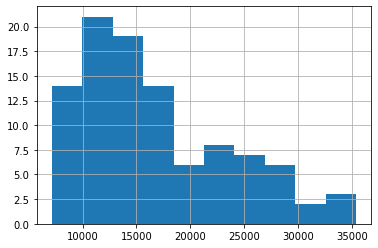

In [14]:
df_annual_salary['annual_salary'].hist(bins=10)

Approximately 3 people are the ones with the highest payment salaries.

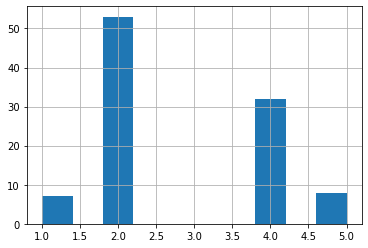

In [15]:
df_annual_salary['avg_num_payments'].hist(bins=10)

A little more than half of 100 customers have 2 payments per month. And one third has 4 payments per month. Could be an important feature to take into consideration.

In [16]:
df_annual_salary[df_annual_salary['customer_id'] == 'CUS-1005756958']

,customer_id,annual_salary,num_payments,avg_num_payments
0,CUS-1005756958,12616.11,13,4


In [17]:
df_customer_salary[df_customer_salary['customer_id'] == 'CUS-1005756958']

,customer_id,month,amount_month,num_of_payments,base_salary
0,CUS-1005756958,8,3881.88,4,970.47
1,CUS-1005756958,9,3881.88,4,970.47
2,CUS-1005756958,10,4852.35,5,970.47


- The revelant fields in "df_annual_salary" are 'amount' and 'avg_num_payments' 

- The revelant field in "df_customer_salary" is 'salary' 

## Explore correlations between annual salary and various customer attributes

There are some original features( readily available in the data) that can be relevant to compare against annual salary, such as: 'age', 'gender', 'long_lat' and 'balance'

In [18]:
df_salary_payment[['customer_id','age','gender','long_lat','balance']].nunique()

customer_id    100
age             33
gender           2
long_lat       100
balance        883
dtype: int64

It seems the feature BALANCE has different values in each customer. It needs to be average per each customer. 

In [19]:
# Calculating the average of balance for each customer.
df_avg_balance = df_salary_payment[['customer_id','balance']].groupby(['customer_id'], as_index=False).mean()
df_avg_balance.head(6)

,customer_id,balance
0,CUS-1005756958,4718.665385
1,CUS-1117979751,11957.202857
2,CUS-1140341822,5841.720000
3,CUS-1147642491,8813.467692
4,CUS-1196156254,23845.717143
5,CUS-1220154422,9225.907143


## Get unique data per customer

In [20]:
df_final = df_salary_payment[['customer_id','age','gender','long_lat']].copy()
df_final.drop_duplicates('customer_id', inplace=True)
df_final.reset_index(drop=True,inplace=True)
df_final.head(6)

,customer_id,age,gender,long_lat
0,CUS-1005756958,53,F,153.03 -27.51
1,CUS-1117979751,21,M,115.81 -31.82
2,CUS-1140341822,28,M,144.97 -37.42
3,CUS-1147642491,34,F,151.04 -33.77
4,CUS-1196156254,34,F,138.52 -35.01
5,CUS-1220154422,25,F,150.50 -23.40


In [21]:
df_final['balance'] = df_avg_balance['balance']

Features like GENDER and LOCATION(long_lat) need to be converted to numbers in order to analyze the correlation between salary.

In [22]:
# convert gender column to Integer type
df_final['gender'] =  df['gender'].map( {'M':1, 'F':0} )
df_final.head(6)

,customer_id,age,gender,long_lat,balance
0,CUS-1005756958,53,0,153.03 -27.51,4718.665385
1,CUS-1117979751,21,0,115.81 -31.82,11957.202857
2,CUS-1140341822,28,1,144.97 -37.42,5841.720000
3,CUS-1147642491,34,0,151.04 -33.77,8813.467692
4,CUS-1196156254,34,0,138.52 -35.01,23845.717143
5,CUS-1220154422,25,1,150.50 -23.40,9225.907143


<b> Calculate distance of customers from Centre of Australia </b>
    
If we analyze long and lat as single values, that probably won't tell us too much things.

So we are going to use those values to calculated how far a custorm is from the centre of Australia (Lambert Gravitational Centre) [latitude: -25.610111,  longitude: 134.354806]

Reference: https://www.wikiwand.com/en/Centre_points_of_Australia

In [23]:
long_lat = df_final['long_lat'].str.split(" ", n = 1, expand = True)
df_final['long'] = long_lat[0].astype('float')
df_final['lat'] = long_lat[1].astype('float')
df_final.drop(['long_lat'], axis = 1, inplace=True)
df_final.head(6)

,customer_id,age,gender,balance,long,lat
0,CUS-1005756958,53,0,4718.665385,153.03,-27.51
1,CUS-1117979751,21,0,11957.202857,115.81,-31.82
2,CUS-1140341822,28,1,5841.720000,144.97,-37.42
3,CUS-1147642491,34,0,8813.467692,151.04,-33.77
4,CUS-1196156254,34,0,23845.717143,138.52,-35.01
5,CUS-1220154422,25,1,9225.907143,150.50,-23.40


In [24]:
centre_latitude = -25.610111
centre_longitude = 134.354806

import math
def calculateDistance(row):
    return math.sqrt((row['long'] - centre_longitude)**2 +  (row['lat'] - centre_latitude)**2)



In [25]:
df_final['location_dist'] = df_final.apply(lambda row: calculateDistance(row), axis=1)
df_final.drop(['long', 'lat'], axis = 1, inplace=True)
df_final.head(6)

,customer_id,age,gender,balance,location_dist
0,CUS-1005756958,53,0,4718.665385,18.771586
1,CUS-1117979751,21,0,11957.202857,19.556905
2,CUS-1140341822,28,1,5841.720000,15.879415
3,CUS-1147642491,34,0,8813.467692,18.573623
4,CUS-1196156254,34,0,23845.717143,10.281379
5,CUS-1220154422,25,1,9225.907143,16.295763


Now, we can concatenate the final information with values we derived/construct ourselves.

- from "df_annual_salary" -> 'amount'(total salary over months) and 'avg_num_payments'

- from "df_customer_salary" -> 'salary' (base salary)

In [26]:
df_customer_unique = df_customer_salary.drop_duplicates(['customer_id']).reset_index(drop = True)

### Concatenate original selected features with created ones

In [27]:
data_annual = pd.concat([df_final, df_annual_salary[['annual_salary', 'avg_num_payments']]], axis=1)
data  = pd.concat([data_annual, df_customer_unique['base_salary']], axis =1 )
data.head(6)

,customer_id,age,gender,balance,location_dist,annual_salary,avg_num_payments,base_salary
0,CUS-1005756958,53,0,4718.665385,18.771586,12616.11,4,970.47
1,CUS-1117979751,21,0,11957.202857,19.556905,25050.55,2,3578.65
2,CUS-1140341822,28,1,5841.720000,15.879415,11499.06,2,1916.51
3,CUS-1147642491,34,0,8813.467692,18.573623,22248.07,4,1711.39
4,CUS-1196156254,34,0,23845.717143,10.281379,27326.11,2,3903.73
5,CUS-1220154422,25,1,9225.907143,16.295763,15976.52,2,2282.36


In [28]:
# reorder columns
columns = [col for col in data.columns if col != 'annual_salary'] + ['annual_salary']
data = data[columns]
data.head(6)

,customer_id,age,gender,balance,location_dist,avg_num_payments,base_salary,annual_salary
0,CUS-1005756958,53,0,4718.665385,18.771586,4,970.47,12616.11
1,CUS-1117979751,21,0,11957.202857,19.556905,2,3578.65,25050.55
2,CUS-1140341822,28,1,5841.720000,15.879415,2,1916.51,11499.06
3,CUS-1147642491,34,0,8813.467692,18.573623,4,1711.39,22248.07
4,CUS-1196156254,34,0,23845.717143,10.281379,2,3903.73,27326.11
5,CUS-1220154422,25,1,9225.907143,16.295763,2,2282.36,15976.52


### Calculate Pearson Correlation between fields

In [29]:
df_all_corr = data.corr()
df_all_corr

,age,gender,balance,location_dist,avg_num_payments,base_salary,annual_salary
age,1.000000,-0.021263,0.227026,-0.087073,0.187163,-0.135264,-0.036504
gender,-0.021263,1.000000,0.059663,-0.100321,-0.051730,-0.072938,-0.109313
balance,0.227026,0.059663,1.000000,-0.033805,-0.192136,0.231019,0.198755
location_dist,-0.087073,-0.100321,-0.033805,1.000000,-0.061067,0.070881,0.097938
avg_num_payments,0.187163,-0.051730,-0.192136,-0.061067,1.000000,-0.693218,-0.030318
base_salary,-0.135264,-0.072938,0.231019,0.070881,-0.693218,1.000000,0.534883
annual_salary,-0.036504,-0.109313,0.198755,0.097938,-0.030318,0.534883,1.000000


In [30]:
df_all_corr= df_all_corr.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'annual_salary']

,Feature 1,Feature 2,Correlation Coefficient
0,annual_salary,annual_salary,1.000000
10,annual_salary,base_salary,0.534883
15,annual_salary,balance,0.198755
23,annual_salary,gender,0.109313
28,annual_salary,location_dist,0.097938
41,annual_salary,age,0.036504
46,annual_salary,avg_num_payments,0.030318


"base_salary" has a strong correlation with annual_salary. 

We can not conclude changes in the variable cause changes in annual_salary based on correlation alone. Only properly controlled experiments enable us to determine whether a relationship is causal.

A low Pearson correlation coefficient does not mean that no relationship exists between the variables. 

The variables may have a nonlinear relationship. To check for nonlinear relationships graphically,we will create a scatterplot and use a simple regression model.

In [31]:
from scipy.stats import pearsonr
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

df_all_corr_pValue = data.corr(method=pearsonr_pval)
df_all_corr_pValue= df_all_corr_pValue.unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_all_corr_pValue.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'P-Value Correlation'}, inplace=True)
df_all_corr_pValue[df_all_corr_pValue['Feature 1'] == 'annual_salary']

,Feature 1,Feature 2,P-Value Correlation
3,annual_salary,base_salary,9.884301e-09
8,annual_salary,balance,4.743560e-02
17,annual_salary,gender,2.789715e-01
21,annual_salary,location_dist,3.323434e-01
34,annual_salary,age,7.184211e-01
38,annual_salary,avg_num_payments,7.646067e-01
48,annual_salary,annual_salary,1.000000e+00


There is inconclusive evidence about the significance of the association between the variables.

# Plots to see correlations

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


## Base_salary vs Annual Salary

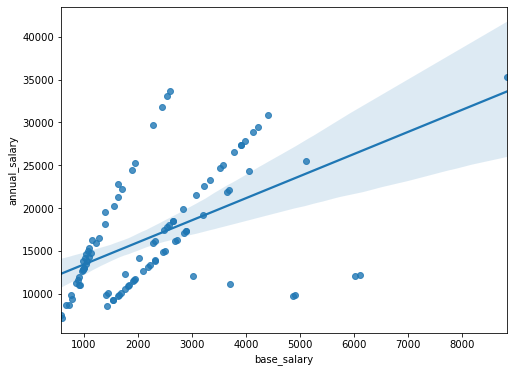

In [33]:
plt.figure(figsize=(8, 6))
sns.regplot("base_salary", "annual_salary", data=data)

## balance vs Annual Salary

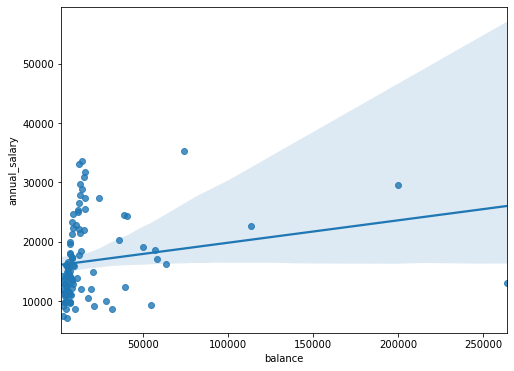

In [34]:
plt.figure(figsize=(8, 6))
sns.regplot("balance", "annual_salary", data=data)

## Age vs Annual Salary

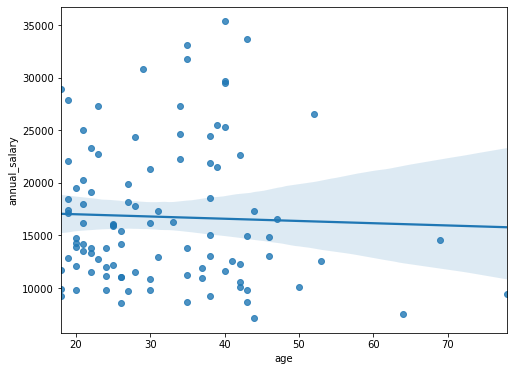

In [35]:
plt.figure(figsize=(8, 6))
sns.regplot("age", "annual_salary", data=data)

<b> We have an outlier in "Location distance" feature</b>

In [36]:
data['location_dist'].max()

560.5273886392439

# Model Builiding - Regression Model

In [37]:
X=data[['age' , 'gender', 'balance', 'location_dist', 'avg_num_payments', 'base_salary']].values
y=data['annual_salary'].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X, y)

0.5231347070503298

## Regression Model - Results

In [40]:
from sklearn.metrics import r2_score
y_predict=lr.predict(X_test)
#R-squared is a statistical measure of how close the data are to the fitted regression line.
# It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression
print('Regression Model, R-squared: ', r2_score(y_test, y_predict))

Regression Model, R-squared:  0.4192405895493032


In [41]:
from sklearn.metrics import mean_squared_error
# RMSE - Root Mean Squared Error 
print('Regression Model, RMSE', np.sqrt(mean_squared_error(y_test, y_predict)))

Regression Model, RMSE 4876.661047214676


## Regression Model Analysis
- The model’s R-squared shows that it only explains about 40% of variation in customers’annual salary.

- The RMSE of the model over 20% of the data is near 5000, which indicates somehow the inaccuracy of the model.

- Probably, more data is required to develop a more reliable model.


# Model Builiding - Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor(max_depth=5,random_state=0)
dectree.fit(X_train, y_train)
dectree.score(X_train, y_train)



0.9630003955678947

## Decision Tree Model - Results

In [43]:
y_predict = dectree.predict(X_test)
print('Decision Tree, R-squared: ', r2_score(y_test, y_predict))
print('Decision Tree, RMSE', np.sqrt(mean_squared_error(y_test, y_predict)))

Decision Tree, R-squared:  0.1501796279735662
Decision Tree, RMSE 5899.130613268002


## Decision Tree Analysis

The Decision Tree model got an R-squared value of 0.96 , which is very close to 1, indicating the model can be able to explain  the annual salary variability.

However, the model achieved a RMSE of 5899 which is a litlle bit higher than that of the linear regression model (4876)



# Final Conclusion

Even though the Decision Tree model is performing better than the Linear Regression model in terms of its R-square value, we can not conclude is will be fine to consider useful as it has a higher RMSE.

This means that the absolute fit of the model is much worse, overall. For that reason, neither of both models should be considered to segment the customers.

Taking in mind that we only have 3 months of data, it would be good to compare the generated models with more data, and also another machine learning technique can be applied in order to see if there is room for improvement.